In [290]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA

import tensorflow as tf

# Loading and Getting a Glimpse of Dataset

In [271]:
data = pd.read_excel(r'D:\Code\py_code\Multi-Layer-Perceptron\data\BA_AirlineReviews_CL_excel.xlsx',header=0)

data.head()

,id,Satisfaction,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,0,Very Dissatisfied,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,2023-11-01,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN
1,1,Neutral,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,2023-11-01,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0
2,2,Enthusiastic,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,2023-11-01,3.0,3.0,4.0,3.0,yes,A320,4.0,NaN,NaN
3,3,Very Dissatisfied,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,2022-12-01,3.0,3.0,1.0,1.0,no,NaN,NaN,NaN,NaN
4,4,Very Dissatisfied,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,2023-11-01,1.0,1.0,1.0,1.0,no,NaN,1.0,1.0,1.0


In [272]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3701 entries, 0 to 3700
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     3701 non-null   int64         
 1   Satisfaction           3701 non-null   object        
 2   ReviewHeader           3701 non-null   object        
 3   Name                   3701 non-null   object        
 4   Datetime               3701 non-null   object        
 5   VerifiedReview         3701 non-null   bool          
 6   ReviewBody             3701 non-null   object        
 7   TypeOfTraveller        2930 non-null   object        
 8   SeatType               3699 non-null   object        
 9   Route                  2926 non-null   object        
 10  DateFlown              2923 non-null   datetime64[ns]
 11  SeatComfort            3585 non-null   float64       
 12  CabinStaffService      3574 non-null   float64       
 13  Gro

# Preprocessing Data

**Checking missing value**

In [273]:
data.isnull().sum()

id                          0
Satisfaction                0
ReviewHeader                0
Name                        0
Datetime                    0
VerifiedReview              0
ReviewBody                  0
TypeOfTraveller           771
SeatType                    2
Route                     775
DateFlown                 778
SeatComfort               116
CabinStaffService         127
GroundService             846
ValueForMoney               1
Recommended                 0
Aircraft                 1779
Food&Beverages            386
InflightEntertainment    1150
Wifi&Connectivity        3092
dtype: int64

**Replace Missing Value**

1. Missing Value Numerical Data

In [274]:
numeric_missing_col = data.columns[(data.isnull().any()) & (data.dtypes != 'object') & (data.columns != 'DateFlown')].to_list()
numeric_missing_col

['SeatComfort',
 'CabinStaffService',
 'GroundService',
 'ValueForMoney',
 'Food&Beverages',
 'InflightEntertainment',
 'Wifi&Connectivity']

In [275]:
numeric = data[numeric_missing_col].values

impNumeric = SimpleImputer(strategy='constant', fill_value=0)
impNumeric = impNumeric.fit(numeric)
numeric = impNumeric.transform(numeric)
data[numeric_missing_col] = numeric

data.isnull().sum()

id                          0
Satisfaction                0
ReviewHeader                0
Name                        0
Datetime                    0
VerifiedReview              0
ReviewBody                  0
TypeOfTraveller           771
SeatType                    2
Route                     775
DateFlown                 778
SeatComfort                 0
CabinStaffService           0
GroundService               0
ValueForMoney               0
Recommended                 0
Aircraft                 1779
Food&Beverages              0
InflightEntertainment       0
Wifi&Connectivity           0
dtype: int64

2. Missing Value Nominal Data

In [276]:
nominal_missing_col = data.columns[(data.isnull().any()) & (data.dtypes == 'object')].to_list()
nominal_missing_col.append('DateFlown')
nominal_missing_col

['TypeOfTraveller', 'SeatType', 'Route', 'Aircraft', 'DateFlown']

In [277]:
nominal = data[nominal_missing_col].values

impNominal = SimpleImputer(strategy='constant', fill_value='unknown')
impNominal = impNominal.fit(nominal)
nominal = impNominal.transform(nominal)
data[nominal_missing_col] = nominal

data.isnull().sum()

id                       0
Satisfaction             0
ReviewHeader             0
Name                     0
Datetime                 0
VerifiedReview           0
ReviewBody               0
TypeOfTraveller          0
SeatType                 0
Route                    0
DateFlown                0
SeatComfort              0
CabinStaffService        0
GroundService            0
ValueForMoney            0
Recommended              0
Aircraft                 0
Food&Beverages           0
InflightEntertainment    0
Wifi&Connectivity        0
dtype: int64

**Removing Unwanted Feature**

In [278]:
data.drop(['id', 'Name','Datetime','DateFlown', 'ReviewHeader', 'ReviewBody', 'Route', 'Aircraft'], inplace=True, axis = 1)
data.head()

,Satisfaction,VerifiedReview,TypeOfTraveller,SeatType,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,Very Dissatisfied,True,Couple Leisure,Economy Class,1.0,1.0,1.0,1.0,no,0.0,0.0,0.0
1,Neutral,True,Business,Economy Class,2.0,3.0,1.0,2.0,no,1.0,2.0,2.0
2,Enthusiastic,False,Couple Leisure,Business Class,3.0,3.0,4.0,3.0,yes,4.0,0.0,0.0
3,Very Dissatisfied,True,Couple Leisure,Economy Class,3.0,3.0,1.0,1.0,no,0.0,0.0,0.0
4,Very Dissatisfied,False,Couple Leisure,Economy Class,1.0,1.0,1.0,1.0,no,1.0,1.0,1.0


**Features & Label Encoding**

1. Categorical Features Encoding

In [279]:
encoder = OneHotEncoder(sparse_output=False)

categorical_col = ['TypeOfTraveller', 'SeatType']
for col in categorical_col:
    encoded_data = encoder.fit_transform(data[[col]])
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out([col]))
    data = pd.concat([data, encoded_df], axis=1)
    data = data.drop([col], axis=1)

data.head()

,Satisfaction,VerifiedReview,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Food&Beverages,InflightEntertainment,Wifi&Connectivity,TypeOfTraveller_Business,TypeOfTraveller_Couple Leisure,TypeOfTraveller_Family Leisure,TypeOfTraveller_Solo Leisure,TypeOfTraveller_unknown,SeatType_Business Class,SeatType_Economy Class,SeatType_First Class,SeatType_Premium Economy,SeatType_unknown
0,Very Dissatisfied,True,1.0,1.0,1.0,1.0,no,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Neutral,True,2.0,3.0,1.0,2.0,no,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Enthusiastic,False,3.0,3.0,4.0,3.0,yes,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,Very Dissatisfied,True,3.0,3.0,1.0,1.0,no,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,Very Dissatisfied,False,1.0,1.0,1.0,1.0,no,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


2. Binary Features Encoding

In [280]:
lbenc = LabelEncoder()

for i in data.columns.values:
    if (data[i].dtypes == "object" or data[i].dtypes == "bool") and i != "Satisfaction":
        data[i] = lbenc.fit_transform(data[i].astype(str))

data.head()

,Satisfaction,VerifiedReview,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Food&Beverages,InflightEntertainment,Wifi&Connectivity,TypeOfTraveller_Business,TypeOfTraveller_Couple Leisure,TypeOfTraveller_Family Leisure,TypeOfTraveller_Solo Leisure,TypeOfTraveller_unknown,SeatType_Business Class,SeatType_Economy Class,SeatType_First Class,SeatType_Premium Economy,SeatType_unknown
0,Very Dissatisfied,1,1.0,1.0,1.0,1.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Neutral,1,2.0,3.0,1.0,2.0,0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Enthusiastic,0,3.0,3.0,4.0,3.0,1,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,Very Dissatisfied,1,3.0,3.0,1.0,1.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,Very Dissatisfied,0,1.0,1.0,1.0,1.0,0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


3. Label Encoding

In [281]:
satisfaction_order = [
    "Very Dissatisfied",
    "Dissatisfied",
    "Neutral",
    "Satisfied",
    "Very Satisfied",
    "Enthusiastic",
    "Extremely Satisfied",
    "Delighted",
    "Evangelist",
    "Advocate",
]

ordinal_enc = OrdinalEncoder(categories=[satisfaction_order])
data["Satisfaction"] = ordinal_enc.fit_transform(data[["Satisfaction"]])

data.head()

,Satisfaction,VerifiedReview,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Food&Beverages,InflightEntertainment,Wifi&Connectivity,TypeOfTraveller_Business,TypeOfTraveller_Couple Leisure,TypeOfTraveller_Family Leisure,TypeOfTraveller_Solo Leisure,TypeOfTraveller_unknown,SeatType_Business Class,SeatType_Economy Class,SeatType_First Class,SeatType_Premium Economy,SeatType_unknown
0,0.0,1,1.0,1.0,1.0,1.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2.0,1,2.0,3.0,1.0,2.0,0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,5.0,0,3.0,3.0,4.0,3.0,1,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1,3.0,3.0,1.0,1.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0,1.0,1.0,1.0,1.0,0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


**Splitting the Data**

In [282]:
features = data.values[:, 1:]
label = data['Satisfaction']

x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.1, random_state=42)

**Features Scaling**

In [283]:
scaler = StandardScaler()
scaler.fit(features)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [284]:
col = data.columns.to_list()
col.remove('Satisfaction')

x_train = pd.DataFrame(x_train, columns=col)
x_test = pd.DataFrame(x_test,columns=col)

In [285]:
# import pandas as pd
# from sklearn.model_selection import train_test_split

# # Assuming data is a DataFrame with features in columns 1 and onwards, and labels in the first column
# features = data.iloc[:, 1:].values
# label = data.iloc[:, 0].values

# # Split the data into training and testing sets with stratification
# x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.1, random_state=42)

# class_1_ratio = 0.7
# class_2_ratio = 0.3

# num_class_1_instances = int(len(y_train) * class_1_ratio)
# num_class_2_instances = int(len(y_train) * class_2_ratio)
# num_class_1_instances_test = int(len(y_test) * class_1_ratio)
# num_class_2_instances_test = int(len(y_test) * class_2_ratio)

# # Convert y_train to a pandas Series to use iloc
# y_train_series = pd.Series(y_train)
# y_test_series = pd.Series(y_test)

# # Extract indices of class 1 and class 2 instances
# class_1_indices = y_train_series[y_train_series.isin([0, 1])].index
# class_2_indices = y_train_series[~y_train_series.isin([0, 1])].index
# class_1_indices_test = y_test_series[y_test_series.isin([0, 1])].index
# class_2_indices_test = y_test_series[~y_test_series.isin([0, 1])].index

# # Sample instances based on the calculated number of instances for each class
# selected_class_1_indices = class_1_indices[:num_class_1_instances]
# selected_class_2_indices = class_2_indices[:num_class_2_instances]
# selected_class_1_indices_test = class_1_indices_test[:num_class_1_instances_test]
# selected_class_2_indices_test = class_2_indices_test[:num_class_2_instances_test]

# # Combine indices of selected instances for both classes
# selected_indices = selected_class_1_indices.union(selected_class_2_indices)
# selected_indices_test = selected_class_1_indices_test.union(selected_class_2_indices_test)

# # Use the selected indices to create the final training set
# X_train_final = x_train[selected_indices]
# y_train_final = y_train[selected_indices]
# X_test_final = x_test[selected_indices_test]
# y_test_final = y_test[selected_indices_test]

# X_train_final.shape, y_train_final.shape, X_test_final.shape, y_test_final.shape

# Feature Selection

,VerifiedReview,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Food&Beverages,InflightEntertainment,Wifi&Connectivity,TypeOfTraveller_Business,TypeOfTraveller_Couple Leisure,TypeOfTraveller_Family Leisure,TypeOfTraveller_Solo Leisure,TypeOfTraveller_unknown,SeatType_Business Class,SeatType_Economy Class,SeatType_First Class,SeatType_Premium Economy,SeatType_unknown
VerifiedReview,1.000000,-0.094357,-0.091356,0.172386,-0.103803,-0.086690,-0.124111,-0.123495,0.185653,0.079731,0.048661,0.080124,0.148884,-0.343857,0.012294,0.023116,-0.041172,-0.024348,-0.016370
SeatComfort,-0.094357,1.000000,0.648009,0.308363,0.706266,0.653229,0.623607,0.397850,0.082301,-0.137559,-0.039785,-0.027777,0.044257,0.145008,0.034027,-0.123755,0.160327,0.030571,-0.030580
CabinStaffService,-0.091356,0.648009,1.000000,0.316430,0.670842,0.654642,0.706176,0.349496,0.082681,-0.130300,-0.013862,-0.014969,0.026486,0.119124,0.111552,-0.144532,0.121823,-0.028346,-0.002339
GroundService,0.172386,0.308363,0.316430,1.000000,0.324957,0.307818,0.253599,0.076136,0.168263,0.060415,0.219165,0.103900,0.253681,-0.638722,0.008498,-0.020639,0.028186,0.001022,-0.023270
ValueForMoney,-0.103803,0.706266,0.670842,0.324957,1.000000,0.798919,0.698633,0.386932,0.031691,-0.170751,-0.058611,-0.032965,0.049878,0.194140,0.044500,-0.065973,0.072059,-0.013568,-0.028139
Recommended,-0.086690,0.653229,0.654642,0.307818,0.798919,1.000000,0.674065,0.342177,0.031495,-0.164350,-0.056231,-0.020650,0.055825,0.170006,0.082458,-0.092450,0.046818,-0.009562,-0.020331
Food&Beverages,-0.124111,0.623607,0.706176,0.253599,0.698633,0.674065,1.000000,0.474522,0.106643,-0.152630,-0.022955,-0.052084,0.009434,0.195834,0.170318,-0.225756,0.123697,0.014478,-0.006758
InflightEntertainment,-0.123495,0.397850,0.349496,0.076136,0.386932,0.342177,0.474522,1.000000,0.189658,-0.121206,-0.046236,-0.013231,-0.048216,0.222868,0.028160,-0.177566,0.155092,0.130805,0.009745
Wifi&Connectivity,0.185653,0.082301,0.082681,0.168263,0.031691,0.031495,0.106643,0.189658,1.000000,0.072120,0.035125,0.090914,0.006849,-0.181259,0.012202,-0.036631,0.001603,0.039460,0.018782
TypeOfTraveller_Business,0.079731,-0.137559,-0.130300,0.060415,-0.170751,-0.164350,-0.152630,-0.121206,0.072120,1.000000,-0.274278,-0.159214,-0.257832,-0.235834,0.110007,-0.085214,-0.008091,-0.022534,-0.011176


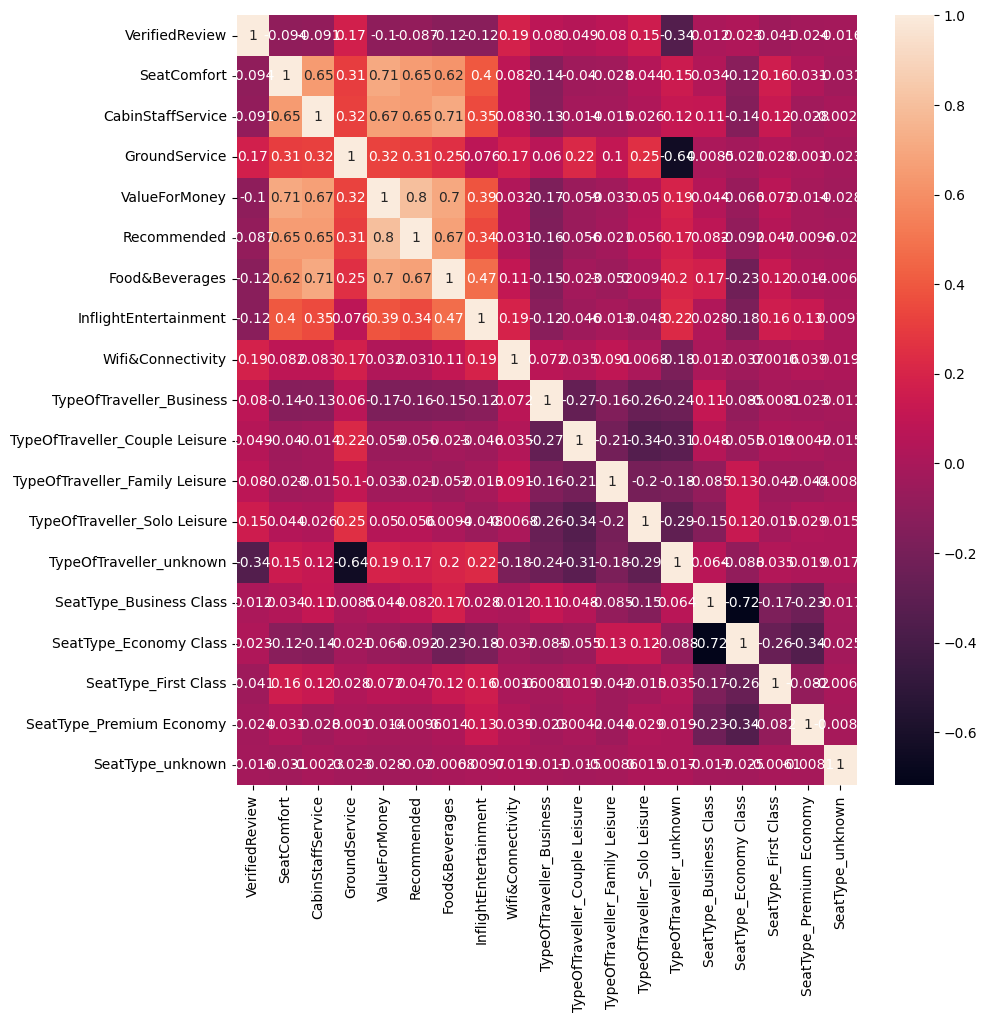

In [286]:
correlation_matrix = pd.DataFrame(x_train).corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True ,ax=ax)
correlation_matrix

In [287]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = pd.DataFrame(dataset, columns=col).corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [289]:
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
print(to_drop)

x_train = x_train.drop(x_train.columns[to_drop], axis=1)
x_test = x_test.drop(x_test.columns[to_drop], axis=1)

[]


In [291]:
pca = PCA(n_components=0.95)
pca.fit(x_train)
PCA_X_train = pca.transform(x_train)
PCA_X_test = pca.transform(x_test)